Content curs

*   Intro computer vision -- prezentare
*   Exemple de transformari in pytorch
*   Prelucrarea unui dataset
*   Antrenarea unui model
*   Evaluarea performantei modelului antrenat





# Tipuri de transformari

Libraria transforms din pytorch dispune de o serie larga de transformari pe imagini.
Aceastea pot sa fie:



1.   Transformari de conversie intre formate
2.   Transformari de culoare. Modifica valorile pixelilor.
3.   Transformari geometrice. Modifica orientarea sau forma imaginii noastre.
4.   Trasnformari ce combin serii de imagini.



Importam librariile pe care le vom folosi

In [ ]:
import torch
import torchvision.transforms.v2 as transforms
from torchvision.utils import make_grid
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image

Descarcam o imagine de pe net

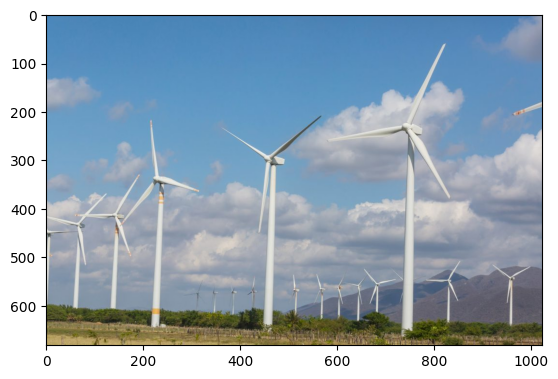

In [ ]:
import numpy as np
import cv2

url ="https://renewcosolar.com.au/wp-content/uploads/2023/11/windmill-1024x682.jpg"

with urllib.request.urlopen(url) as url_response:
  img_array = np.array(bytearray(url_response.read()),dtype=np.uint8)
  img = cv2.imdecode(img_array,-1)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# Conversii intre formate

In python avem o serie de mai multe librarii care suporta imagini:


1.   Pillow
2.   Opencv
3.   Torchvision din Pytorch

Intre aceste librarii se pot face usor conversii a imaginilor, in functie de suportul celorlalte librarii cu care lucram sau de a functionalitatii de care avem nevoie. In exemplul de mai sus pentru a decoda imaginea descarcata ne-am folosit de opencv.



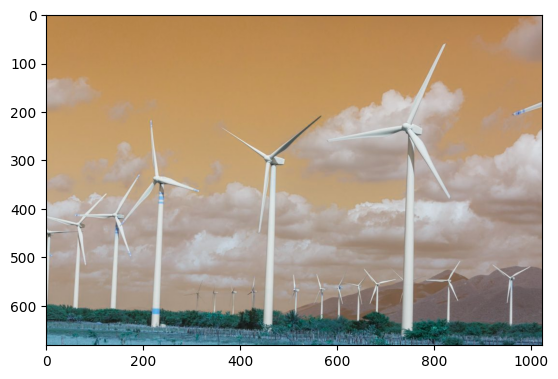

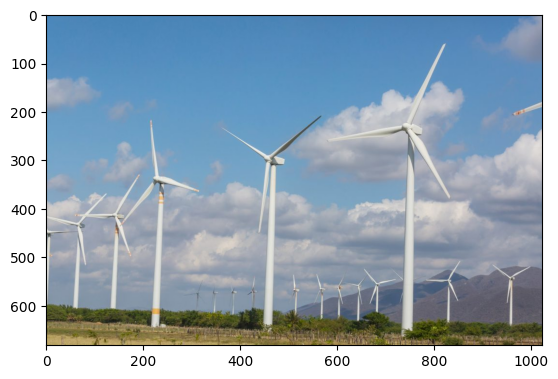

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


torch.Size([3, 682, 1024])


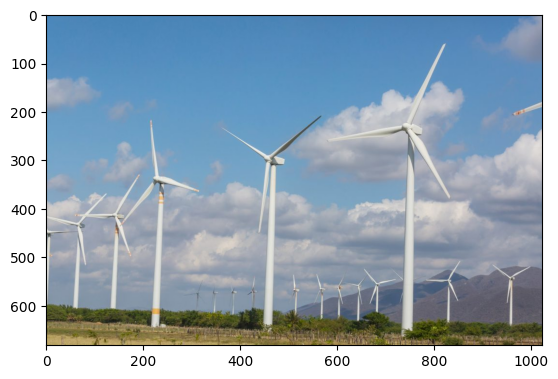

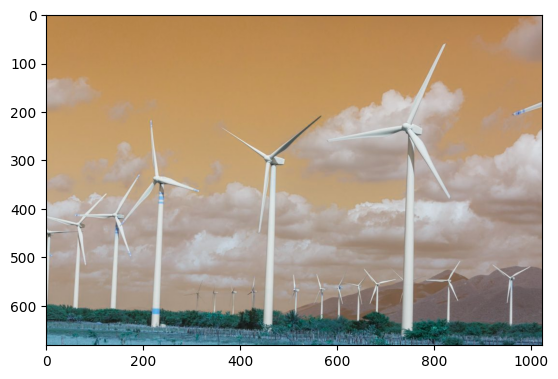

In [ ]:
# Imaginea din OpenCV ( Lucreaza cu valorile de R si B inversate, formatul valorilor pixelilor fiind BGR )
plt.imshow(img)
plt.show()

# Facem conversie in Pillow ( Revenim cu formatul pixelilor in RGB)
pillow_img = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.imshow(pillow_img)
plt.show()

# Pentru a lucra cu transformarile, si modele din pytorch trebuie sa schimbat imaginea in formatul de tensor
tensor_img = transforms.ToTensor()(pillow_img)
print(tensor_img.shape)

# Conversie inapoi in format pillow
pillow_img = transforms.ToPILImage()(tensor_img)
plt.imshow(pillow_img)
plt.show()


#Conversie din pillow in opencv
cv_image = cv2.cvtColor(np.array(pillow_img),cv2.COLOR_RGB2BGR)
plt.imshow(cv_image)
plt.show()

**In continuare o sa lucram cu formatul de tensor**

# Transformari de culoare

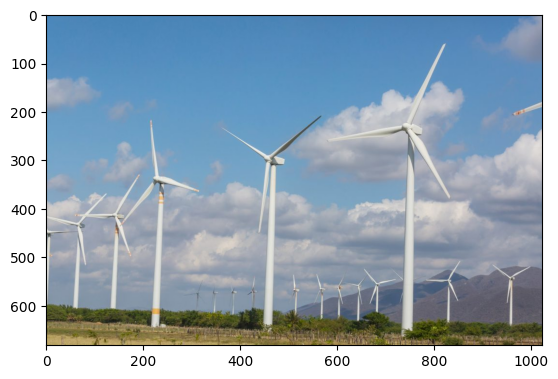

In [ ]:
# Imaginea originala
plt.imshow(transforms.ToPILImage()(tensor_img))
plt.show()

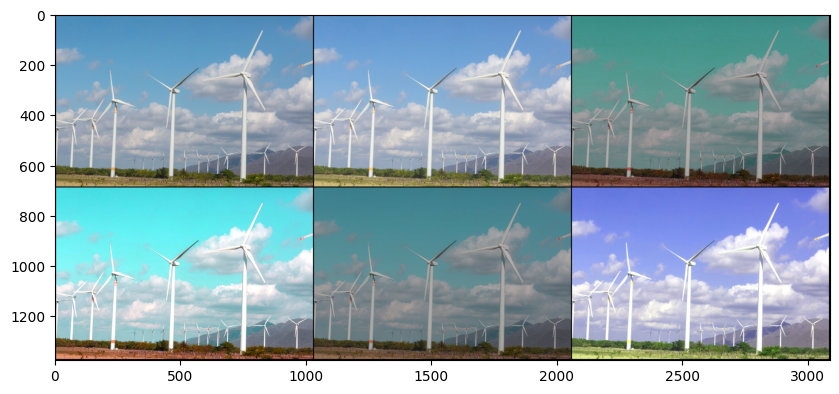

In [ ]:
# Color Jitter
variations = []

for i in range(6):
  variations.append(transforms.ColorJitter(brightness = 0.3, contrast = 0.15, saturation = 0.1, hue = 0.1)(tensor_img))

grid = make_grid(variations, nrow = 3, padding = 4)

plt.figure(figsize = (10,5) )
plt.imshow(grid.transpose(0,1).transpose(1,2).numpy())
plt.show()

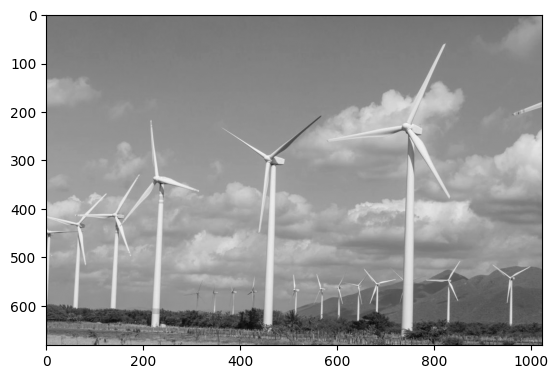

In [ ]:
# Grayscale
img = transforms.Grayscale()(tensor_img)
plt.imshow(transforms.ToPILImage()(img),cmap='gray')
plt.show()

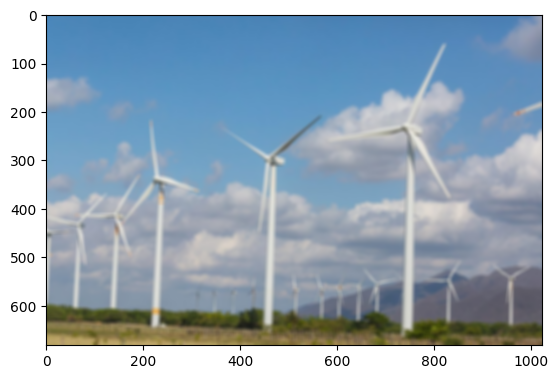

In [ ]:
# GaussianBlur
img = transforms.GaussianBlur(kernel_size=(11,11),sigma=(0.2,5))(tensor_img)
plt.imshow(transforms.ToPILImage()(img))
plt.show()

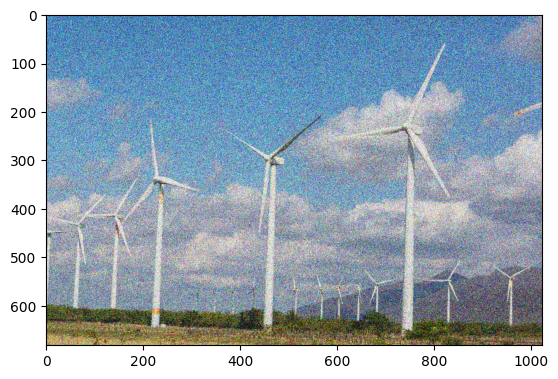

In [ ]:
# GaussianNoise
img = transforms.GaussianNoise(mean=0,sigma=min(0.2,np.random.random()))(tensor_img)
plt.imshow(transforms.ToPILImage()(img))
plt.show()

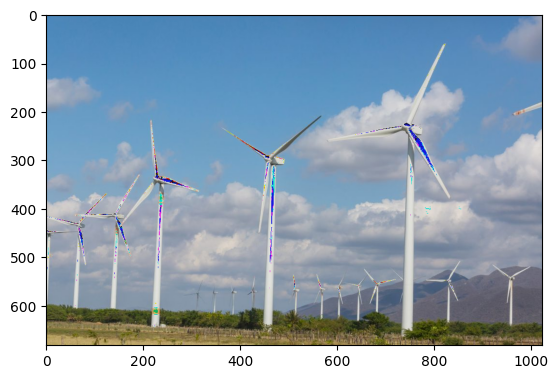

In [ ]:
# RandomSolarize
img = transforms.RandomSolarize(threshold=np.random.randint(215,240)/255,p=1)(tensor_img)
plt.imshow(transforms.ToPILImage()(img))
plt.show()

# Transformari geometrice

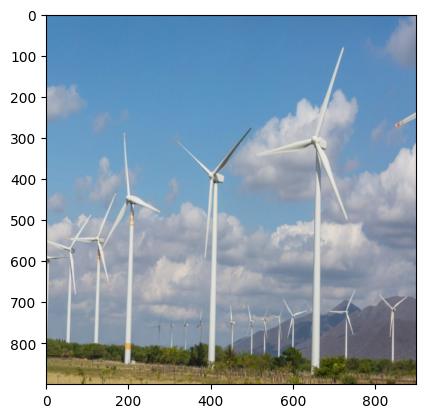

In [ ]:
# Resize
img = transforms.Resize(size=(900,900))(tensor_img)
plt.imshow(transforms.ToPILImage()(img))
plt.show()

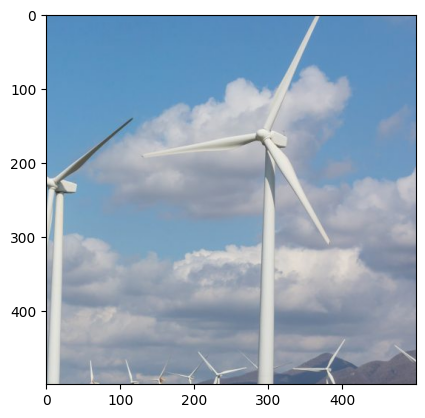

In [ ]:
# Crop
img = transforms.RandomCrop(size=(500,500))(tensor_img)
plt.imshow(transforms.ToPILImage()(img))
plt.show()

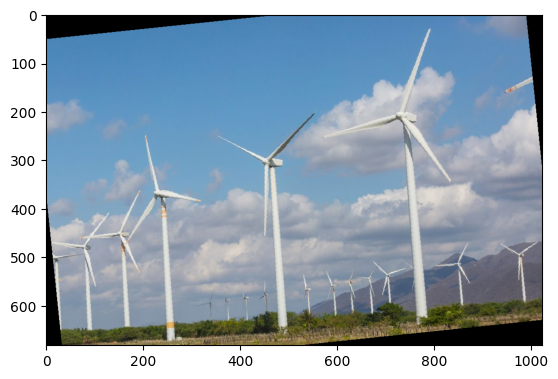

In [ ]:
# RandomRotation
img = transforms.RandomRotation(degrees=(-25,25))(tensor_img)
plt.imshow(transforms.ToPILImage()(img))
plt.show()

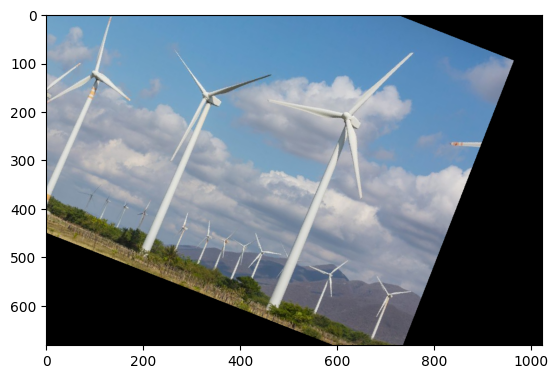

In [ ]:
# Affine
img = transforms.RandomAffine(degrees=(-25,25), translate=(0.2,0.2))(tensor_img)
plt.imshow(transforms.ToPILImage()(img))
plt.show()

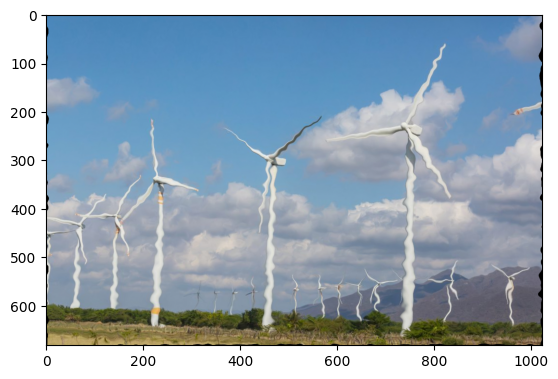

In [ ]:
# ElasticTransform
img = transforms.ElasticTransform(alpha = np.random.randint(50,150), sigma=5)(tensor_img)
plt.imshow(transforms.ToPILImage()(img))
plt.show()

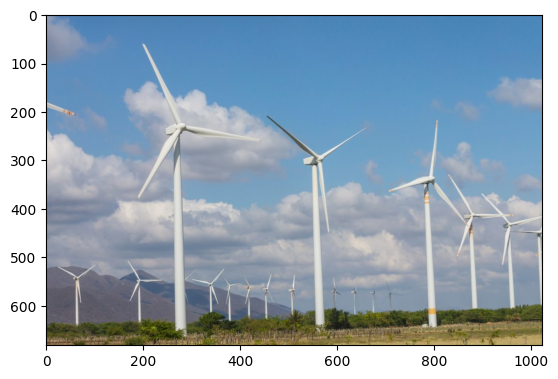

In [ ]:
# HorizontalFlip
img = transforms.RandomHorizontalFlip(p=0.5)(tensor_img)
plt.imshow(transforms.ToPILImage()(img))
plt.show()

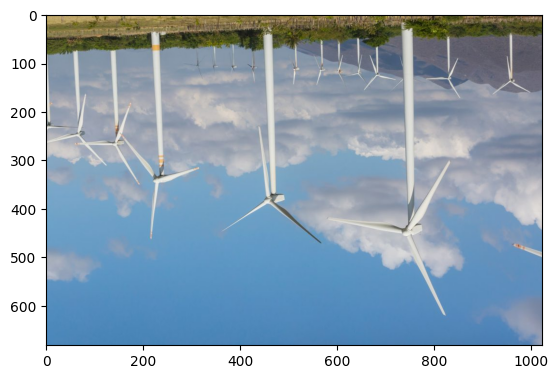

In [ ]:
# VerticalFlip
img = transforms.RandomVerticalFlip(p=1)(tensor_img)
plt.imshow(transforms.ToPILImage()(img))
plt.show()

# Transformari pe serii

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


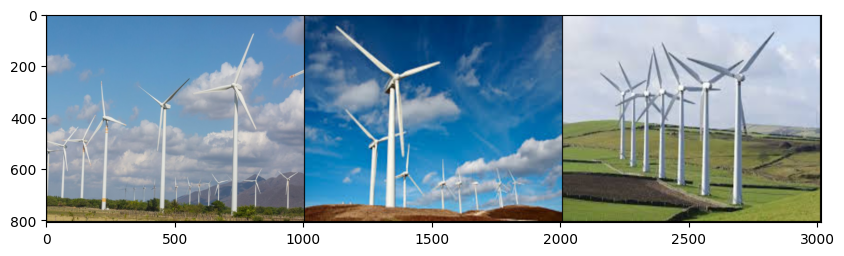

In [ ]:
urls = ['https://renewcosolar.com.au/wp-content/uploads/2023/11/windmill-1024x682.jpg',
        'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRig9hn_RcvkEkIBSxIowkUS7fvObYiYm8qVw&s',
        'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEDbjf1725m8mcTJA1wfX2jb3aEg1tJaxg4g&s'
       ]

images = []

for url in urls:
  with urllib.request.urlopen(url) as url_response:
    img_array = np.array(bytearray(url_response.read()),dtype=np.uint8)
    img =cv2.cvtColor(cv2.imdecode(img_array,-1),cv2.COLOR_BGR2RGB)
    images.append(transforms.Resize((800,1000))(transforms.ToTensor()(img)))

grid = make_grid(images, nrow = 3, padding = 4)

plt.figure(figsize = (10,5) )
plt.imshow(grid.transpose(0,1).transpose(1,2).numpy())
plt.show()

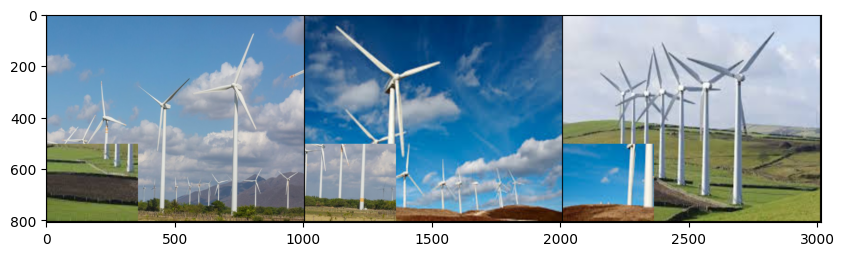

In [ ]:
# CutMix

labels = torch.zeros(len(images)).unsqueeze(dim=1)
batch_images = torch.stack(images)
res = transforms.CutMix(num_classes=1, alpha = 1.0)(batch_images,labels)


grid = make_grid(res[0], nrow = 3, padding = 4)

plt.figure(figsize = (10,5) )
plt.imshow(grid.transpose(0,1).transpose(1,2).numpy())
plt.show()

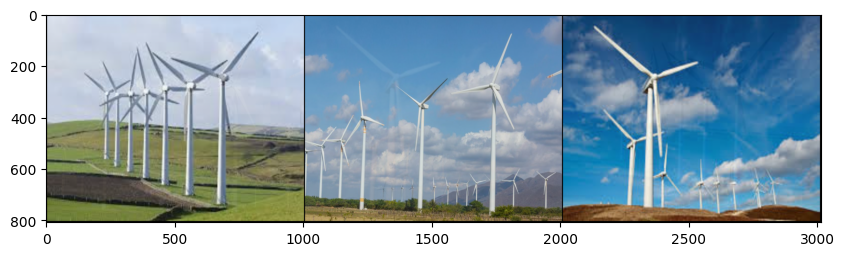

In [ ]:
# MixUp
labels = torch.zeros(len(images)).unsqueeze(dim=1)
batch_images = torch.stack(images)
res = transforms.MixUp(num_classes=1, alpha = 1.0)(batch_images,labels)


grid = make_grid(res[0], nrow = 3, padding = 4)

plt.figure(figsize = (10,5) )
plt.imshow(grid.transpose(0,1).transpose(1,2).numpy())
plt.show()


# Augmentarea unui dataset

Vom folosi dataset-ul https://www.kaggle.com/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision

In [ ]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=87375ab625db09e7a0b15f64fb1e4b72220a2adc403ec4c1be9cf7eef993f3f4
  Stored in directory: /root/.cache/pip/wheels/2e/27/39/f44e52756a6407b444143f233abe9fda0e18a23e8b20e0cd1c
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download kylegraupe/wind-turbine-image-dataset-for-computer-vision

100% 615M/617M [00:33<00:00, 20.8MB/s]
100% 617M/617M [00:33<00:00, 19.2MB/s]


In [ ]:
!unzip /content/wind-turbine-image-dataset-for-computer-vision.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/images/windmill38_jpg.rf.18ca44b93a71069515473052727878fd.jpg  
  inflating: train/images/windmill38_jpg.rf.2177f1a5c403ad423103042546fd177f.jpg  
  inflating: train/images/windmill38_jpg.rf.2b1a4bbcd4fd8c7ef63a0b0704b9894f.jpg  
  inflating: train/images/windmill38_jpg.rf.2df1c417aba8fc4efae6bee731484943.jpg  
  inflating: train/images/windmill38_jpg.rf.57a70129e462bceb5096604fb4fb0cac.jpg  
  inflating: train/images/windmill38_jpg.rf.59bf2c49243c836a211d2ce80f55fb40.jpg  
  inflating: train/images/windmill38_jpg.rf.75cb92200f5a421938230203103d8739.jpg  
  inflating: train/images/windmill38_jpg.rf.82e54312624825140e91e44193899bc9.jpg  
  inflating: train/images/windmill38_jpg.rf.8f8f9214864bb6ff4fa2494790875ce4.jpg  
  inflating: train/images/windmill38_jpg.rf.91befc3de7166174d26dc0b78f66e4e9.jpg  
  inflating: train/images/windmill38_jpg.rf.91ebdee917c879774b3e647508796bfb.jpg  
  inflating: train/images/windmill38

Vom folosi doar imagini cu windmills si cabletower

In [ ]:
# Filtram pozele noastre

import os
import glob

train_paths = []
test_paths = []

windmills_cnt =0
cabletower_cnt = 0

files = glob.glob(os.path.join('/content/train/images','*'))

for path in files:
  if 'windmill' in path and windmills_cnt < 60:
    train_paths.append([path,0])
    windmills_cnt += 1

  if 'cabletower' in path and cabletower_cnt < 60:
    train_paths.append([path,1])
    cabletower_cnt += 1

  if windmills_cnt == 60 and cabletower_cnt == 60:
    break


windmills_cnt =0
cabletower_cnt = 0

files = glob.glob(os.path.join('/content/test/images','*'))

for path in files:
  if 'windmill' in path and windmills_cnt < 10:
    test_paths.append([path,0])
    windmills_cnt += 1

  if 'cabletower' in path and cabletower_cnt < 10:
    test_paths.append([path,1])
    cabletower_cnt += 1

  if windmills_cnt == 10 and cabletower_cnt == 10:
    break



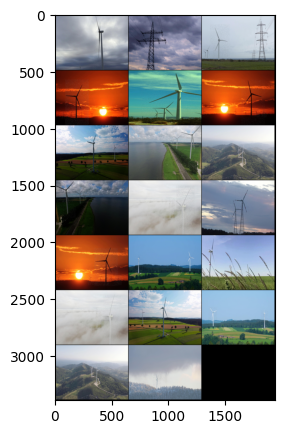

In [ ]:
# Putem afisa cateva din imaginile noastre
images = []


for data in train_paths[:20]:
  images.append(transforms.ToTensor()(Image.open(data[0]).resize((640,480))))

grid = make_grid(images, nrow = 3, padding = 4)

plt.figure(figsize = (10,5) )
plt.imshow(grid.transpose(0,1).transpose(1,2).numpy())
plt.show()

In [ ]:
# Ne declaram dataset-ul
import torch.utils.data as tdata

device = 'cuda'

class Dataset(tdata.Dataset):
  def __init__(self,data):
    self.images = []
    self.labels = []

    for d in data:
      self.images.append(transforms.ToTensor()(Image.open(d[0]).resize((1920,1080))))
      self.labels.append(torch.tensor(1000 + d[1]))


  def __getitem__(self,idx):
    return self.images[idx].to(device), self.labels[idx].to(device)

  def __len__(self):
    return len(self.images)


train_dataset = Dataset(train_paths)
test_dataset = Dataset(test_paths)

[]

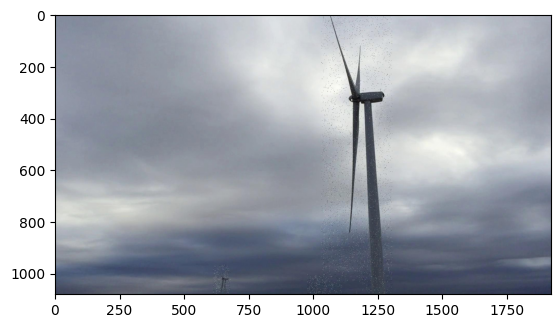

In [ ]:
plt.imshow(transforms.ToPILImage()(train_dataset[0][0]))
plt.plot()

In [ ]:
# Declaram functia de collate si Dataloader-ul

batch_size = 5

def collate_fn(examples):
  images = []
  labels = []

  for id in range(batch_size):
    images.append(examples[id][0].to(device))
    labels.append(examples[id][1].to(device))

  custom_transforms = transforms.Compose([
      transforms.RandomApply([transforms.ColorJitter(brightness = 0.3, contrast = 0.15, saturation = 0.1, hue = 0.1)],p=0.3),

      transforms.RandomApply([transforms.GaussianBlur(kernel_size=(11,11),sigma=(0.2,5))],p=0.3),

      transforms.RandomApply([transforms.GaussianNoise(mean=0,sigma=min(0.2,np.random.random()))],p=0.3),

      transforms.RandomApply([transforms.RandomSolarize(threshold=np.random.randint(215,240)/255,p=1)],p=0.3),

      transforms.RandomApply([transforms.RandomAffine(degrees=(-25,25), translate=(0.2,0.2))],p=0.3),

      transforms.RandomVerticalFlip(p=0.3)
  ])

  for id in range(batch_size):
    images.append(custom_transforms(examples[id][0]).to(device))
    labels.append(examples[id][1].to(device))

  return images, labels


train_dataloader = tdata.DataLoader(
    train_dataset,
    collate_fn=collate_fn,
    batch_size=batch_size
)

# Antrenarea unui model

In demo-ul nostru o s antrenam si evaluam un model de clasificare

In [ ]:
# Incarcam modelul preantrenat
from torchvision.io import decode_image
from torchvision.models import resnet50, ResNet50_Weights


weights = ResNet50_Weights.DEFAULT
model = resnet50(weights)
model.to(device)

preprocess = weights.transforms()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [ ]:
# Testam modelul de baza pe o imagine

def predict(tensor_img):
  prediction = model(preprocess(tensor_img).unsqueeze(0)).squeeze(0).softmax(0)
  class_id = prediction.argmax().item()
  score = prediction[class_id].item()
  category_name = weights.meta['categories'][class_id]
  print(f'{category_name}: {100 * score:.1f}%')


predict(train_dataset[0][0])

tripod: 0.3%


In [ ]:
# Modelul nu cunoaste clasele noastre
'windmill' in weights.meta['categories'] or 'cabletower' in weights.meta['categories']

False

Pentru a antrena pe clasa noastra va trebui sa modificam ultimul layer din model

In [ ]:
output_weights = model.fc.weight.data
output_bias = model.fc.bias.data

new_layer = torch.nn.Linear(model.fc.in_features, output_weights.shape[0] + 2)
new_layer.weight.data[:output_weights.shape[0],:] = output_weights
new_layer.bias.data[:output_bias.shape[0]] = output_bias

model.fc = new_layer

weights.meta['categories'].append('windmill')
weights.meta['categories'].append('cabletower')

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Declaram criterion-ul si optimizer-ul
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.00001)


In [ ]:
# Antrenam modelul
from tqdm import tqdm


epochs = []
epoch_loss = []

for epoch in tqdm(range(15)):
  tloss = 0

  model.train()

  for data in train_dataloader:
    images, labels = data

    preprocessed_images = [ preprocess(image).to(device) for image in images]
    preprocessed_batch = torch.stack(preprocessed_images,dim=0)

    outputs = model(preprocessed_batch)

    loss = criterion(outputs,torch.stack(labels))

    loss.backward()
    optimizer.step()

    tloss += loss.item()

  epochs.append(epoch)
  epoch_loss.append(tloss)


100%|██████████| 15/15 [00:30<00:00,  2.06s/it]


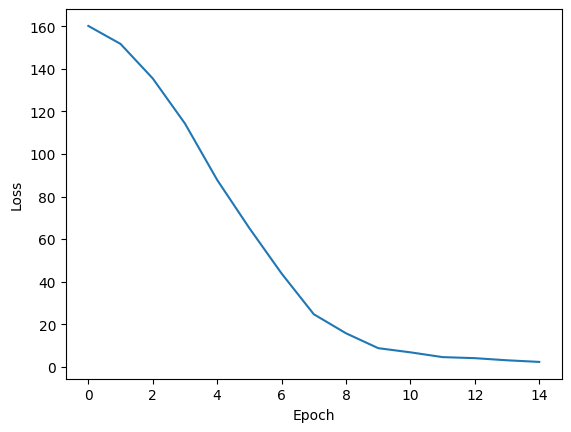

In [ ]:
# Verificam loss-ul
plt.plot(epochs,epoch_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Testam modelul daca a invatat

In [ ]:
model.eval()

for data in test_dataset:
  print('Correct class:', weights.meta['categories'][data[1].item()])
  predict(data[0])
  print()

Correct class: windmill
windmill: 99.9%

Correct class: windmill
windmill: 99.6%

Correct class: windmill
windmill: 94.6%

Correct class: windmill
windmill: 93.1%

Correct class: windmill
windmill: 99.5%

Correct class: windmill
windmill: 95.3%

Correct class: windmill
windmill: 94.6%

Correct class: windmill
windmill: 99.3%

Correct class: windmill
windmill: 99.8%

Correct class: windmill
windmill: 99.7%

Correct class: cabletower
cabletower: 85.9%

Correct class: cabletower
cabletower: 97.2%

Correct class: cabletower
cabletower: 89.5%

Correct class: cabletower
cabletower: 97.5%



# Incheiere

Sper ca v-a placut acest tutorial.
Pe paginile noastre o sa gasiti in continuare informatii despre viitoare cursuri, competiti si evenimente


*   Nitro <br>
https://nitronlp.com/ <br>
https://www.instagram.com/nitro_nlp/

*   AIIS <br>
https://www.aiishow.com/ <br>
https://www.instagram.com/aiis_conference/




